In [1]:
import numpy as np
import time
from scipy import misc, ndimage
from PIL import Image
import matplotlib.pyplot as plt
import random
import os
from data_loader import *
from data_visualizer import *

np.random.seed(2018)

import keras
from keras.models import Sequential
from keras.layers import Activation, Dense, Flatten, Dropout,  Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adam
from sklearn.metrics import accuracy_score, f1_score
from keras.models import load_model
from keras.utils import plot_model
from keras.optimizers import SGD, Adam
from keras.callbacks import CSVLogger, ReduceLROnPlateau
from keras_sequential_ascii import keras2ascii
from sklearn.metrics import accuracy_score, f1_score

Using TensorFlow backend.


In [2]:
#inicializace dat
x_train, y_train = load_data()
x_test, y_test = load_test_data()
print(x_train.shape)
print(x_test.shape)

(6625, 64, 64, 3)
(700, 64, 64, 3)


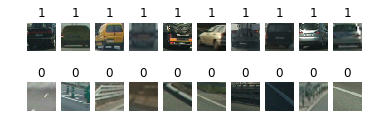

(6630, 64, 64, 3)
(6630,)
(700, 64, 64, 3)
(700,)


In [4]:
# zobrazení testovacích dat
visualize_examples(x_test, y_test, 10)

In [3]:
# vytvoření modelu neuronové sítě
def train_model( x_train, y_train, epochs, batch_size, optimizer):
    
    # inicializace parametrů
    epochs_n = epochs
    batch_size_n = batch_size

    # vytvoření konovlučního modelu
    model = Sequential()
 
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(64,64,3)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
 
    model.add(Conv2D(64,(3, 3),padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128,(3, 3),padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
 
    model.add(Flatten())
    model.add(Dense(1024,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    # nastavení optimizeru
    if (optimizer == 'sgd'):
        sgd = SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=True)
        model.compile(optimizer = sgd, loss = "binary_crossentropy", metrics = ["accuracy"])
        
    elif (optimizer == 'adam'):
        adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
        model.compile(optimizer = adam, loss = "binary_crossentropy", metrics = ["accuracy"])

   
    start = time.time()
    # vytvoření logu trénování
    csv_logger = CSVLogger('nn_deep_conv_1_sgd_400e.log')
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)
    # trénování modelu model.fit()
    history = model.fit(x_train, y_train, validation_split=0.2,  epochs = epochs_n, batch_size = batch_size_n, verbose = 1, callbacks=[csv_logger, reduce_lr])
    end = time.time() 
    
    # vytiskne přehled modelu
    print("Model took %0.2f seconds to train"%(end - start))
    print(model.summary())
    keras2ascii(model)
    print_graphs(history)
    
    # uložení modelu jako .h5
    model.save(r'C:\Users\Petr\Desktop\Bakalářská práce\Neural_networks\deep_nn\nn_deep_conv_1_sgd_400e.h5')
    
    return history, model

Train on 5304 samples, validate on 1326 samples
Epoch 1/400
5304/5304 [==============================] - 64s 12ms/step - loss: 0.5636 - acc: 0.7304 - val_loss: 0.5015 - val_acc: 0.7790
Epoch 2/400
5304/5304 [==============================] - 63s 12ms/step - loss: 0.4414 - acc: 0.8199 - val_loss: 0.4257 - val_acc: 0.8326
Epoch 3/400
5304/5304 [==============================] - 78s 15ms/step - loss: 0.4073 - acc: 0.8335 - val_loss: 0.4129 - val_acc: 0.8356
Epoch 4/400
5304/5304 [==============================] - 66s 13ms/step - loss: 0.3804 - acc: 0.8439 - val_loss: 0.3964 - val_acc: 0.8446
Epoch 5/400
5304/5304 [==============================] - 63s 12ms/step - loss: 0.3700 - acc: 0.8511 - val_loss: 0.3736 - val_acc: 0.8582
Epoch 6/400
5304/5304 [==============================] - 63s 12ms/step - loss: 0.3395 - acc: 0.8627 - val_loss: 0.3472 - val_acc: 0.8650
Epoch 7/400
5304/5304 [==============================] - 63s 12ms/step - loss: 0.3139 - acc: 0.8742 - val_loss: 0.3293 - val_acc: 

5304/5304 [==============================] - 63s 12ms/step - loss: 0.0521 - acc: 0.9844 - val_loss: 0.0658 - val_acc: 0.9751
Epoch 61/400
5304/5304 [==============================] - 63s 12ms/step - loss: 0.0507 - acc: 0.9819 - val_loss: 0.0684 - val_acc: 0.9759
Epoch 62/400
5304/5304 [==============================] - 63s 12ms/step - loss: 0.0497 - acc: 0.9819 - val_loss: 0.0666 - val_acc: 0.9744
Epoch 63/400
5304/5304 [==============================] - 63s 12ms/step - loss: 0.0502 - acc: 0.9844 - val_loss: 0.0671 - val_acc: 0.9751
Epoch 64/400
5304/5304 [==============================] - 62s 12ms/step - loss: 0.0476 - acc: 0.9823 - val_loss: 0.0649 - val_acc: 0.9751
Epoch 65/400
5304/5304 [==============================] - 62s 12ms/step - loss: 0.0470 - acc: 0.9855 - val_loss: 0.0657 - val_acc: 0.9759
Epoch 66/400
5304/5304 [==============================] - 63s 12ms/step - loss: 0.0481 - acc: 0.9827 - val_loss: 0.0651 - val_acc: 0.9766
Epoch 67/400
5304/5304 [=======================

5304/5304 [==============================] - 62s 12ms/step - loss: 0.0352 - acc: 0.9864 - val_loss: 0.0546 - val_acc: 0.9804
Epoch 179/400
5304/5304 [==============================] - 62s 12ms/step - loss: 0.0337 - acc: 0.9889 - val_loss: 0.0551 - val_acc: 0.9804
Epoch 180/400
5304/5304 [==============================] - 62s 12ms/step - loss: 0.0343 - acc: 0.9881 - val_loss: 0.0563 - val_acc: 0.9804
Epoch 181/400
5304/5304 [==============================] - 62s 12ms/step - loss: 0.0379 - acc: 0.9864 - val_loss: 0.0551 - val_acc: 0.9804
Epoch 182/400
5304/5304 [==============================] - 62s 12ms/step - loss: 0.0353 - acc: 0.9877 - val_loss: 0.0573 - val_acc: 0.9796
Epoch 183/400
5304/5304 [==============================] - 62s 12ms/step - loss: 0.0356 - acc: 0.9885 - val_loss: 0.0542 - val_acc: 0.9804
Epoch 184/400
5304/5304 [==============================] - 62s 12ms/step - loss: 0.0370 - acc: 0.9879 - val_loss: 0.0533 - val_acc: 0.9789
Epoch 185/400
5304/5304 [================

5304/5304 [==============================] - 62s 12ms/step - loss: 0.0304 - acc: 0.9893 - val_loss: 0.0549 - val_acc: 0.9811
Epoch 238/400
5304/5304 [==============================] - 62s 12ms/step - loss: 0.0328 - acc: 0.9887 - val_loss: 0.0614 - val_acc: 0.9766
Epoch 239/400
5304/5304 [==============================] - 62s 12ms/step - loss: 0.0330 - acc: 0.9887 - val_loss: 0.0523 - val_acc: 0.9804
Epoch 240/400
5304/5304 [==============================] - 62s 12ms/step - loss: 0.0301 - acc: 0.9917 - val_loss: 0.0520 - val_acc: 0.9827
Epoch 241/400
5304/5304 [==============================] - 62s 12ms/step - loss: 0.0300 - acc: 0.9902 - val_loss: 0.0516 - val_acc: 0.9811
Epoch 242/400
5304/5304 [==============================] - 62s 12ms/step - loss: 0.0325 - acc: 0.9894 - val_loss: 0.0546 - val_acc: 0.9819
Epoch 243/400
5304/5304 [==============================] - 62s 12ms/step - loss: 0.0303 - acc: 0.9894 - val_loss: 0.0500 - val_acc: 0.9811
Epoch 244/400
5304/5304 [================

5304/5304 [==============================] - 62s 12ms/step - loss: 0.0280 - acc: 0.9904 - val_loss: 0.0502 - val_acc: 0.9827
Epoch 297/400
5304/5304 [==============================] - 62s 12ms/step - loss: 0.0274 - acc: 0.9923 - val_loss: 0.0511 - val_acc: 0.9819
Epoch 298/400
5304/5304 [==============================] - 62s 12ms/step - loss: 0.0262 - acc: 0.9915 - val_loss: 0.0506 - val_acc: 0.9819
Epoch 299/400
5304/5304 [==============================] - 63s 12ms/step - loss: 0.0292 - acc: 0.9887 - val_loss: 0.0499 - val_acc: 0.9834
Epoch 300/400
5304/5304 [==============================] - 62s 12ms/step - loss: 0.0285 - acc: 0.9915 - val_loss: 0.0513 - val_acc: 0.9819
Epoch 301/400
5304/5304 [==============================] - 62s 12ms/step - loss: 0.0266 - acc: 0.9919 - val_loss: 0.0487 - val_acc: 0.9827
Epoch 302/400
5304/5304 [==============================] - 62s 12ms/step - loss: 0.0267 - acc: 0.9910 - val_loss: 0.0490 - val_acc: 0.9827
Epoch 303/400
5304/5304 [================

5304/5304 [==============================] - 62s 12ms/step - loss: 0.0244 - acc: 0.9925 - val_loss: 0.0483 - val_acc: 0.9842
Epoch 356/400
5304/5304 [==============================] - 62s 12ms/step - loss: 0.0244 - acc: 0.9915 - val_loss: 0.0485 - val_acc: 0.9842
Epoch 357/400
5304/5304 [==============================] - 62s 12ms/step - loss: 0.0242 - acc: 0.9928 - val_loss: 0.0461 - val_acc: 0.9827
Epoch 358/400
5304/5304 [==============================] - 62s 12ms/step - loss: 0.0252 - acc: 0.9919 - val_loss: 0.0450 - val_acc: 0.9819
Epoch 359/400
5304/5304 [==============================] - 62s 12ms/step - loss: 0.0253 - acc: 0.9913 - val_loss: 0.0489 - val_acc: 0.9834
Epoch 360/400
5304/5304 [==============================] - 62s 12ms/step - loss: 0.0260 - acc: 0.9925 - val_loss: 0.0472 - val_acc: 0.9834
Epoch 361/400
5304/5304 [==============================] - 62s 12ms/step - loss: 0.0252 - acc: 0.9917 - val_loss: 0.0483 - val_acc: 0.9834
Epoch 362/400
5304/5304 [================

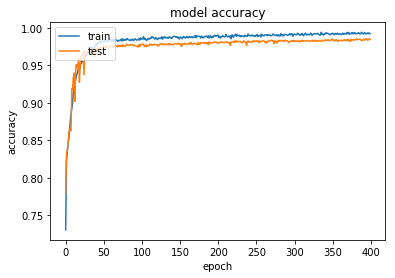

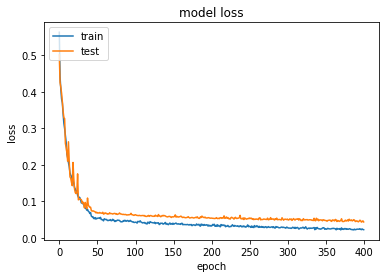

In [4]:
# trénování modelu
history, model = train_model(x_train, y_train, 400, 32, 'sgd')

In [ ]:
# vytvoření modelu jako obrázku
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
plot_model(model, to_file='model_plot_nn_deep_conv_5_adam_10e.png', show_shapes=True, show_layer_names=True)

In [5]:
#odstranit stávající model
del model

NameError: name 'model' is not defined

In [37]:
#načtení uloženého modelu
model = load_model('nn_deep_conv_1_sgd_50e.h5')

In [3]:
# metoda pro udělání predikce na testovacím souboru
def prediction_test(model, x_test, y_test):
    
    test_predictions = model.predict(x_test)
    test_predictions = np.round(test_predictions)

    # vrácení přesnosti predikce
    accuracy = accuracy_score(y_test, test_predictions)
    print("Přesnost testovacího datasetu: " + str(accuracy * 100) + "%")
    
    return test_predictions

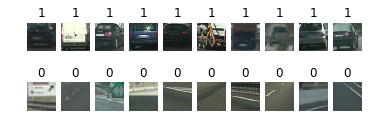

In [15]:
# zobrazení testovacích dat
visualize_examples(x_test, y_test, 10)

In [35]:
# predikce testovacího souboru
test_predictions = prediction_test(model, x_test, y_test)

Přesnost testovacího setu: 96.57142857142857%


počet špatných odhadů: 24


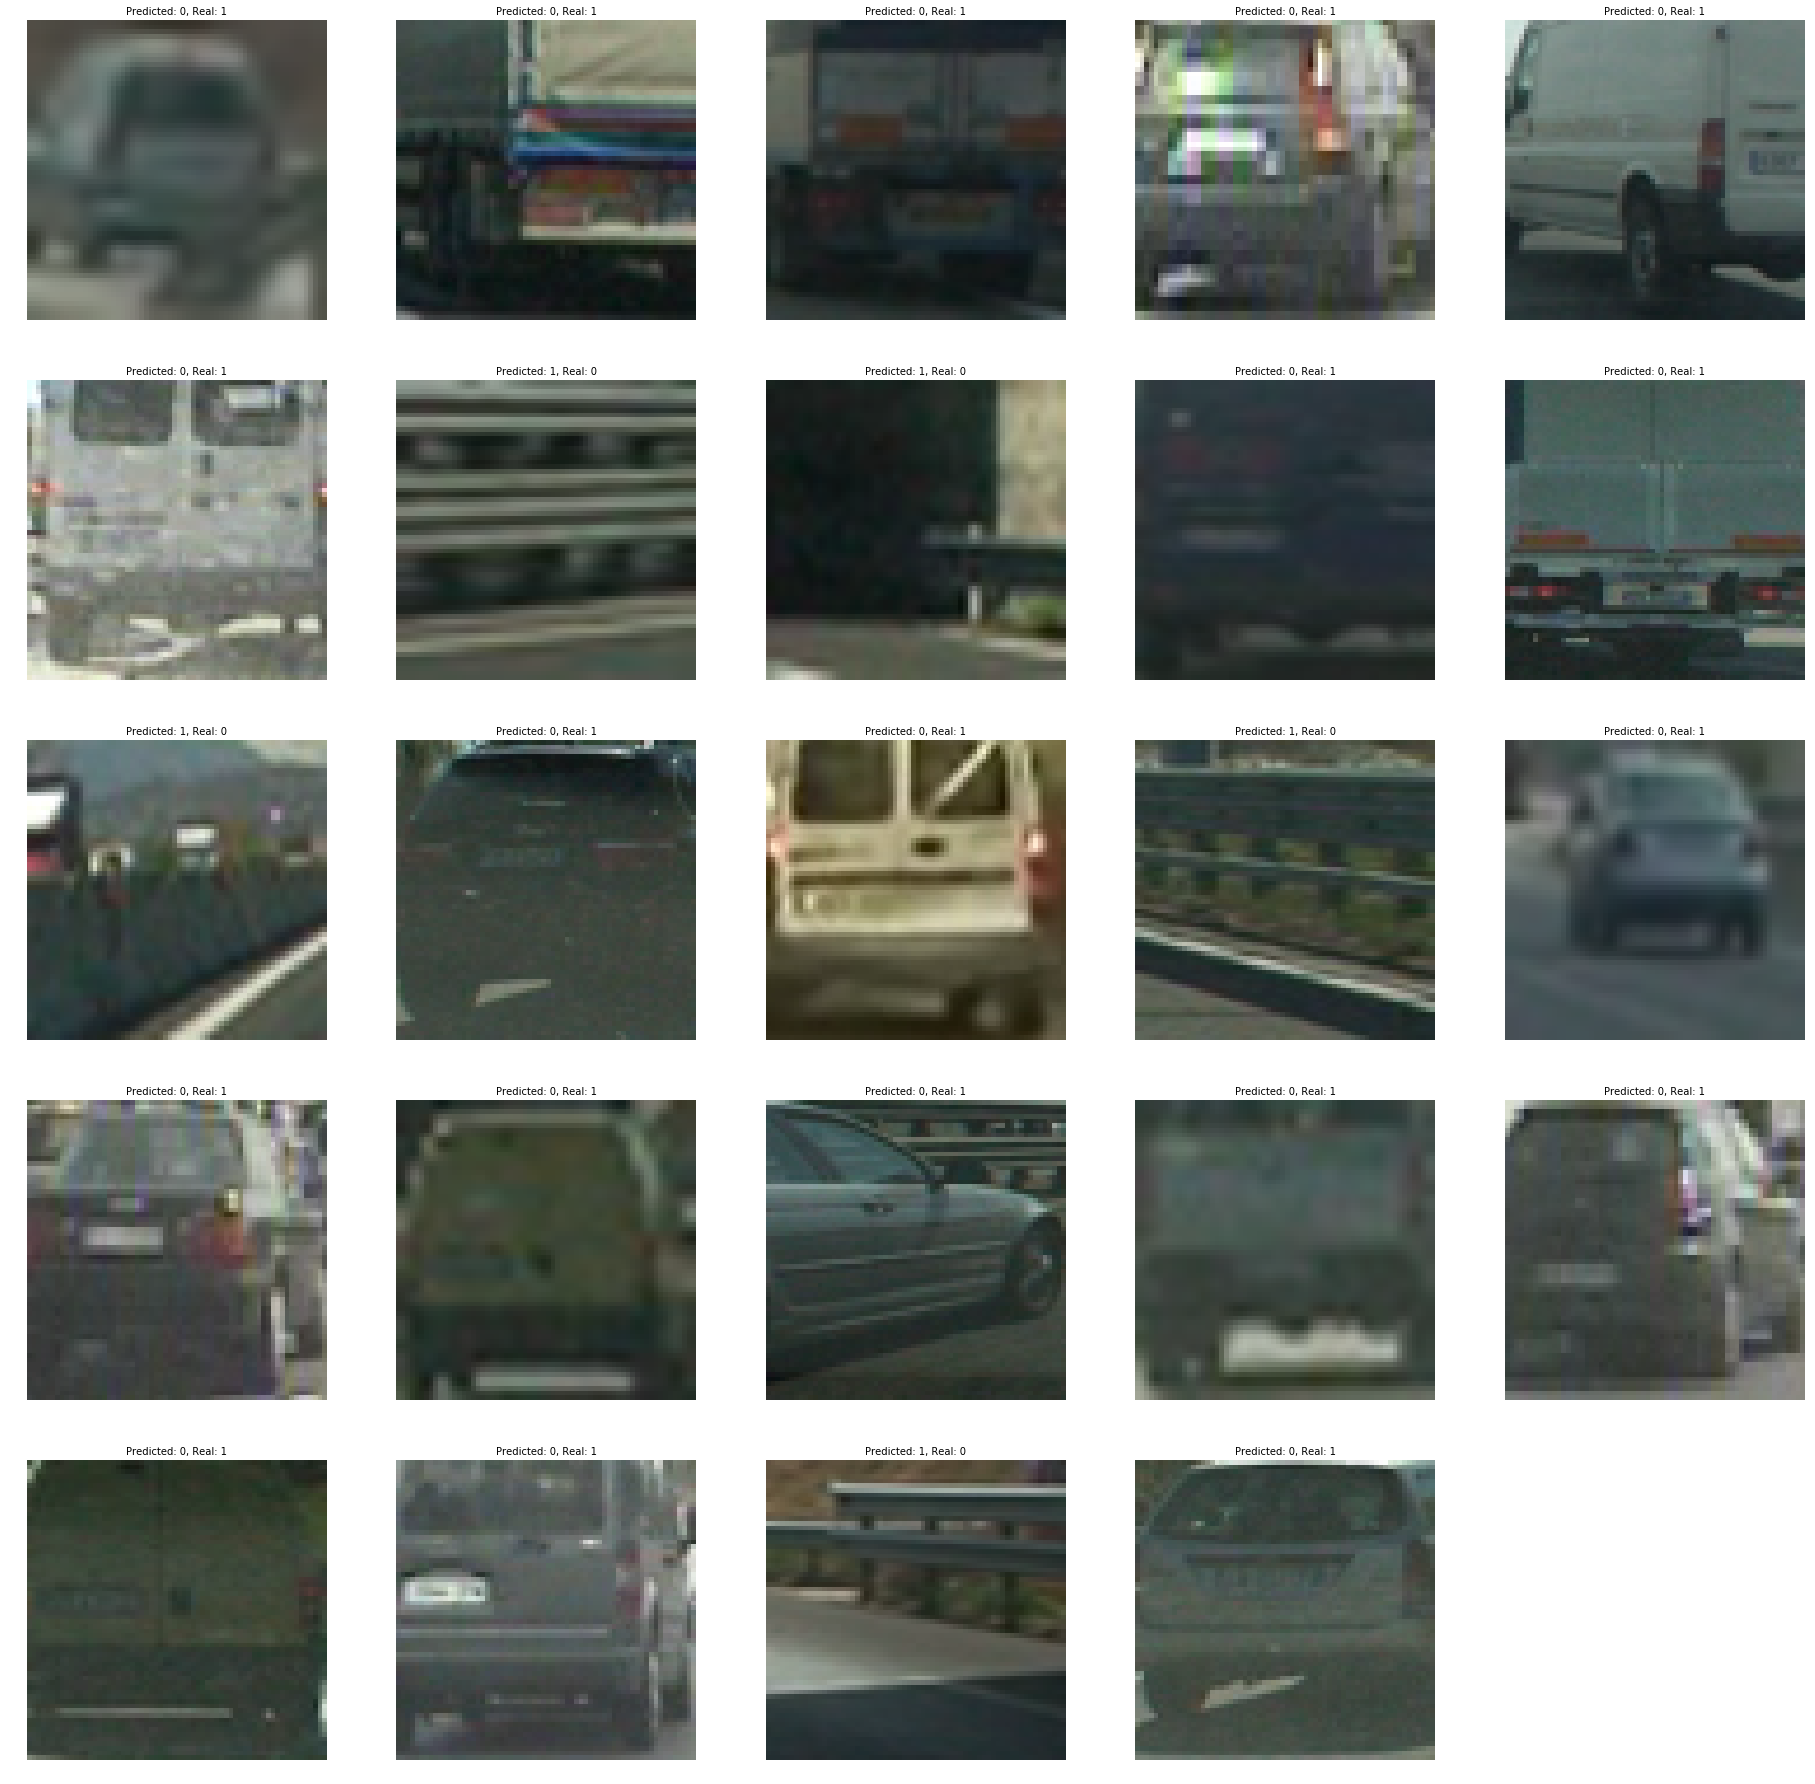

In [36]:
# zobrazení nesprávně označených obrázků
visualize_incorrect_labels(x_test, y_test, np.asarray(test_predictions).ravel())